In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

### 【問題1】線形回帰のクラスを作成する
線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。
以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。
sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation
検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

###### テストデータを生成

In [2]:
#試し用のデータ
feature_value = ["A", "B", "C"]
target_value = ["Target"]
T = [12*i for i in range(1, 11)]
A = [[i for i in range(1, 11)]]
B = [[2*i for i in range(1, 11)]]
C = [[3*i for i in range(1, 11)]]
tmp1 = np.concatenate([A, B]).T
tmp2 = np.array(C).T
#tmp2 = np.concatenate([C, D]).T
target = pd.DataFrame(data=T, columns=target_value)
tmp3 = np.concatenate([tmp1, tmp2], axis=1)
feature = pd.DataFrame(data=tmp3, columns=feature_value)

train_feature, test_feature, train_target, test_target = train_test_split(feature, target, test_size=0.4, random_state=None)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.


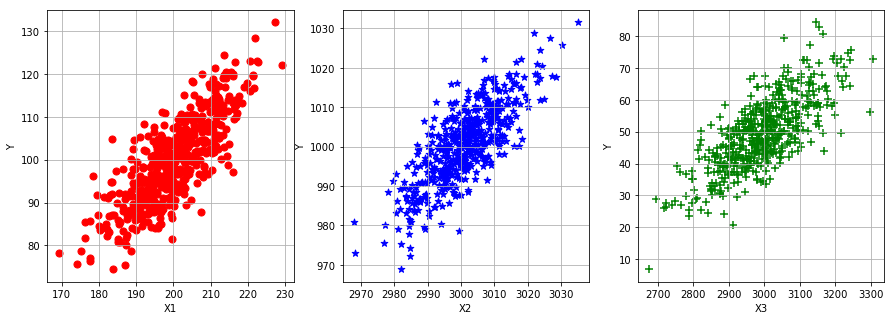

In [3]:
#適当な分散を持つ、線形な(Y1,X1),(Y2,X2),(Y3,X3)を生成
XY1_range = [100, 200]
XY2_range = [1000, 3000]
XY3_range = [50, 3000]
XY1_cov = [[100.0, 80.0], [80.0, 100.0]]
XY2_cov = [[100.0, 80.0], [80.0, 100.0]]
XY3_cov = [[10.0, 800.0], [800.0, 10000.0]]

XY1 = np.random.multivariate_normal(XY1_range, XY1_cov, 500)
XY2 = np.random.multivariate_normal(XY2_range, XY2_cov, 500)
XY3 = np.random.multivariate_normal(XY3_range, XY3_cov, 500)

data = pd.DataFrame()
data["TARGET"] = XY1[:,0] + XY2[:,0] + XY3[:,0]
data["Y1"] = XY1[:,0]
data["Y2"] = XY2[:,0]
data["Y3"] = XY3[:,0]
data["X1"] = XY1[:,1]
data["X2"] = XY2[:,1]
data["X3"] = XY3[:,1]

fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax1.grid(True)
ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
ax1.scatter(data["X1"], data["Y1"], s=50, marker='o', color='r') 
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax2.grid(True)
ax2.set_xlabel('X2')
ax2.set_ylabel('Y')
ax2.scatter(data["X2"], data["Y2"], s=50, marker='*', color='b')             
ax3 = plt.subplot2grid((1, 3), (0, 2))
ax3.grid(True)
ax3.set_xlabel('X3')
ax3.set_ylabel('Y')
ax3.scatter(data["X3"], data["Y3"], s=50, marker='+', color='green')

In [4]:
train_feature, test_feature, train_target, test_target = train_test_split(data[["X1", "X2", "X3"]].values, data["TARGET"].values, test_size=0.4, random_state=None)

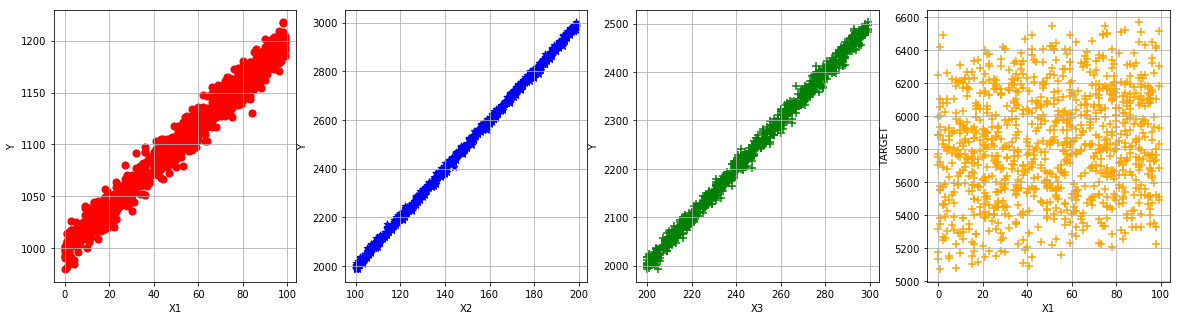

In [5]:
#適当な分散を持つ、線形な(Y1,X1),(Y2,X2),(Y3,X3)を生成
A = 2
B = 1000
X1 = np.array(np.random.randint(0, 100, 1000))
Y1 = np.array((X1 * A + B) + 10*np.random.randn(X1.shape[0]))


A = 10
B = 1000
X2 = np.array(np.random.randint(100, 200, 1000))
Y2 = np.array((X2 * A + B) + 10*np.random.randn(X2.shape[0]))

A = 5
B = 1000
X3 = np.array(np.random.randint(200, 300, 1000))
Y3 = np.array((X3 * A + B) + 10*np.random.randn(X3.shape[0]))

#print(Y1)

data = pd.DataFrame()
data["TARGET"] = Y1 + Y2 + Y3
data["Y1"] = Y1
data["Y2"] = Y2
data["Y3"] = Y3
data["X1"] = X1
data["X2"] = X2
data["X3"] = X3

fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 4), (0, 0))
ax1.grid(True)
ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
ax1.scatter(data["X1"], data["Y1"], s=50, marker='o', color='r') 
ax2 = plt.subplot2grid((1, 4), (0, 1))
ax2.grid(True)
ax2.set_xlabel('X2')
ax2.set_ylabel('Y')
ax2.scatter(data["X2"], data["Y2"], s=50, marker='*', color='b')             
ax3 = plt.subplot2grid((1, 4), (0, 2))
ax3.grid(True)
ax3.set_xlabel('X3')
ax3.set_ylabel('Y')
ax3.scatter(data["X3"], data["Y3"], s=50, marker='+', color='green')
ax3 = plt.subplot2grid((1, 4), (0, 3))
ax3.grid(True)
ax3.set_xlabel('X1')
ax3.set_ylabel('TARGET(Y1+Y2+Y3)')
ax3.scatter(data["X1"], data["TARGET"], s=50, marker='+', color='orange')

##### py fileからclassをimpiort

In [6]:
#とりあえず特徴量X1、ターゲットY1のみで学習を行う。
train_feature, test_feature, train_target, test_target = train_test_split(data[["X1"]].values, data["Y1"].values, test_size=0.4, random_state=None)

In [7]:
from utils import ScratchLinearRegression as cLinearRegression

In [59]:
regr = cLinearRegression.ScratchLinearRegression(num_iter=45000, lr=0.00058, bias=True, verbose=True)

In [60]:
regr.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[4]
 [8]]
Theta:
[[997.51822173]
 [  2.03006559]]
Feature:
[[ 1  1  1 ...  1  1  1]
 [ 6 26 58 ... 58 95 56]]
Target:
[ 995.96170182 1054.60856873 1115.8751357  1015.58768594 1151.75916234
 1009.09303659 1085.72502354 1161.20807235 1208.21120059 1192.23992102
 1118.45063013 1188.39015171 1147.12615136 1027.43164499 1057.2944642
 1048.8500083  1115.72680454 1178.17481773 1136.83896637 1163.97193356
 1181.81119424 1063.98454938 1067.53605004  991.46560281 1145.74033459
 1151.07838786 1061.47247311 1145.23492635  996.08670606 1024.18108723
 1165.07581993 1148.48338816 1192.16880951 1002.14541513 1175.46523764
 1063.21124981 1165.46344202 1055.46537477 1013.3378146  1077.76115181
 1093.22143136 1088.3020863  1127.9240752  1140.24383016 1069.40997362
 1134.68001814 1179.9706418  1047.34245599 1018.13429866 1011.88074262
 1077.14474397 1131.84139058 1106.80843282 1117.25910109 1004.7268305
 1189.83974592 1031.58159806 1079.21890794 1116.41964342 1020.66780638
 1182.81209946 1

Theta result = [997.8, 2.0]  
"Y1 = 2*X1+1000"なので期待通りの結果となった。

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


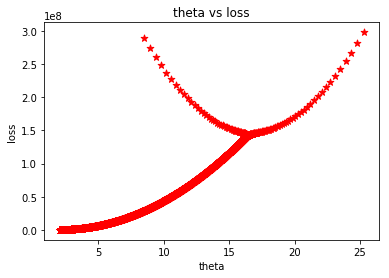

In [61]:
regr.plot_theta_loss()

#### 【問題2】学習曲線のプロット
まず、学習曲線を表示する関数を作成してください。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

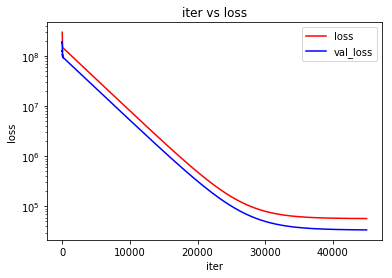

In [62]:
regr.plot_loss()

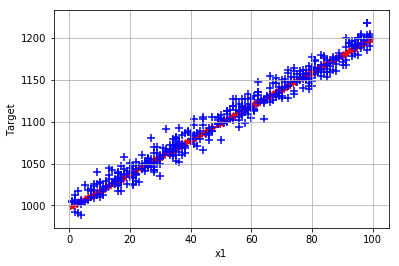

In [63]:
result = regr.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b') 

In [13]:
#特徴量３つでやってみる
train_feature, test_feature, train_target, test_target = train_test_split(data[["X1","X2","X3"]].values, data["TARGET"].values, test_size=0.4, random_state=None)

In [14]:
regr2 = cLinearRegression.ScratchLinearRegression(num_iter=3000000, lr=0.0000205, bias=True, verbose=True)

In [15]:
regr2.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[4]
 [6]
 [4]
 [2]]
Theta:
[[1344.36021838]
 [   2.77536656]
 [  12.75696897]
 [   9.77409467]]
Feature:
[[  1   1   1 ...   1   1   1]
 [ 62  54   8 ...  21  95  89]
 [155 188 154 ... 108 171 122]
 [238 225 295 ... 204 241 235]]
Target:
[5869.16469826 6151.91618037 6018.70791848 5793.99002447 5947.94269661
 5458.83795021 5770.23338828 5911.14648296 6195.59870322 6011.60869026
 6468.65264776 5820.28648183 5449.57437601 6060.9620644  5360.53207359
 5448.09541339 5292.24385471 6259.4859555  6041.24495832 5297.94634356
 5647.99833316 5934.74744663 5858.44447645 5606.51636431 6102.63788649
 5952.76488573 6220.30490585 6162.11036984 6046.06651706 6007.0947699
 5979.9244108  5902.62051117 6066.08615444 5856.51277821 5490.86926785
 5487.09466811 5550.62800403 6031.31222386 5446.87050466 5968.14902178
 6048.5028806  5741.16717693 6340.85739266 6267.9992936  5491.77579569
 6314.08435687 5702.33408269 5584.90646349 5887.40055793 5734.59825475
 5846.87996129 5961.83030912 5950.292

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


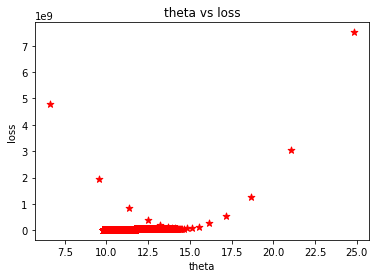

In [16]:
regr2.plot_theta_loss()

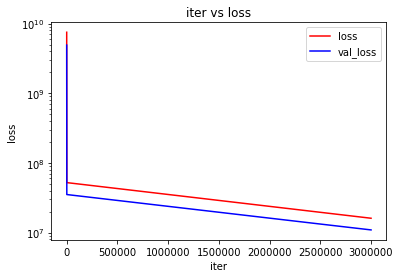

In [17]:
regr2.plot_loss()

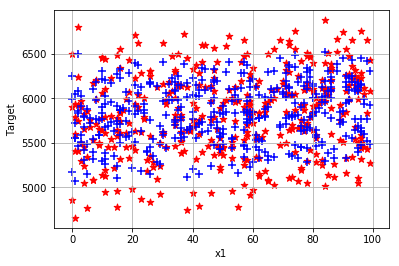

In [18]:
result = regr2.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b') 

#### 【問題3】（アドバンス課題）バイアス項の除去
バイアス項 
θ
0
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [19]:
#簡単のため特徴量：X1, ターゲット：Y1のみを使って検証を行う。（データはバイアス成分を持つ）

In [64]:
train_feature, test_feature, train_target, test_target = train_test_split(data[["X1"]].values, data["Y1"].values, test_size=0.4, random_state=None)

In [65]:
#bias有り
regr_w_bias = cLinearRegression.ScratchLinearRegression(num_iter=45000, lr=0.00058, bias=True, verbose=True)

In [66]:
#bias無し
regr_wo_bias = cLinearRegression.ScratchLinearRegression(num_iter=45000, lr=0.00058, bias=False, verbose=True)

In [67]:
regr_w_bias.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[6]
 [2]]
Theta:
[[998.31581721]
 [  2.03917929]]
Feature:
[[ 1  1  1 ...  1  1  1]
 [76  3 86 ... 53 60 35]]
Target:
[1139.73976064 1026.30973777 1183.11766313 1016.19550304 1004.26347848
 1171.92081665 1145.85548609 1169.9309651  1096.64787525 1073.31392074
 1192.73035302 1087.07850064 1064.83124797 1171.54955583 1042.45789513
 1030.77159452 1048.52860743 1047.18560336  992.7892014  1032.51929371
 1022.86792761 1145.64798717 1179.72719315 1104.39469067 1034.22728807
 1090.64452205 1159.78864137 1147.88967732 1043.782944   1029.72828382
 1029.20475235 1031.24202226 1122.0395799  1164.08445998 1184.70800776
 1013.74776545 1049.27468444 1161.98366421 1146.06396661 1104.190113
 1086.60536528  992.68810641 1203.56979723 1034.43186261 1109.4189331
 1055.58367347 1014.53060864 1078.88069122 1061.47247311 1168.74622655
 1198.85895758 1188.72588312 1179.50832365 1070.50518402 1009.09303659
 1185.20303101 1160.45150388 1102.5670036  1024.18108723 1127.9240752
 1117.25910109 100

In [68]:
regr_wo_bias.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[6]]
Theta:
[[16.98105829]]
Feature:
[[76  3 86 11  1 80 79 87 55 35 99 38 32 90 28 15 28 21  1 13 12 67 83 60
  14 47 82 71 17 15 17 22 53 84 90  1 19 85 67 58 40  0 94 23 54 30  1 46
  27 82 99 85 93 42 15 98 76 51 15 67 62  5 39 22  0 57 42 92  4  2 11 42
  48  1 81 77  8 66 35 35 97 52 79 74 47 20 54 39 60 19 68 28 69 26 62 78
  47  8 24 73 81 53 93 93 64 11 91 30 28 61  2 25 36 79 62 73 56 55 92 74
  44 83 84 40 58 75 54 28  2 76  0 21 93  6 80 27 58  7 88 24 51 48 21 78
  29 52 73 59 56 19 16 97 13 69 89 52 59 33 68 11 97 37 31 91 91 37 96 73
  13 14 47 43 27  5  9 42 67 96 62 50 51 26 80 44 35 65 52 85 10 21 30 92
  66  9 52 83 59  4 30 54  5 96 27 16 18 58 26  2 10 72 90 51  2  8 72 58
  15 80 80 26  3 43 82 95 26  4 29 81 95 49 54 76 16 86 30 83 41 59 18 23
  18 44 98 85 96 13 91 73 49 90  0 41 94 27 51 38 90 16 72  8 94 56 46 21
  95 24 62 24 23 35 21 24 31 46  8  7 57 25 27 12 71 70 60 82 21 89 74 79
  21 91 80 23 37 80  5 11 85 14 75 27 10 97 57 82 72  4 40 

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


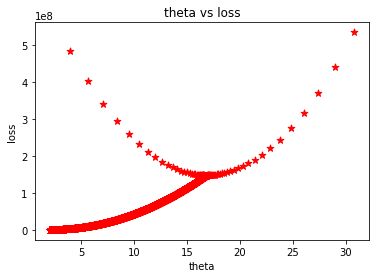

In [178]:
#バイアス有り loss-theta
regr_w_bias.plot_theta_loss()

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


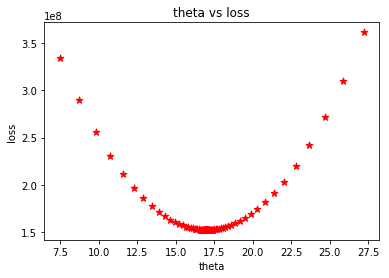

In [179]:
#バイアス無し loss-theta
regr_wo_bias.plot_theta_loss()

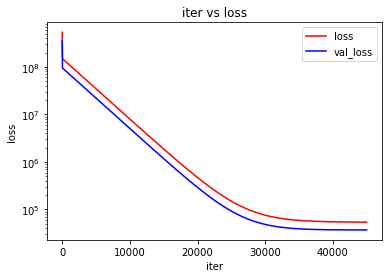

In [69]:
#バイアス有り loss
regr_w_bias.plot_loss()

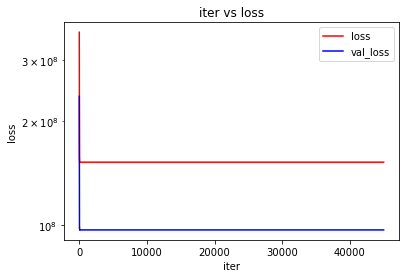

In [70]:
#バイアス無し loss
regr_wo_bias.plot_loss()

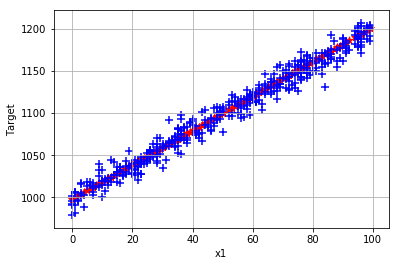

In [72]:
#バイアス有り 予測結果
result = regr_w_bias.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b') 

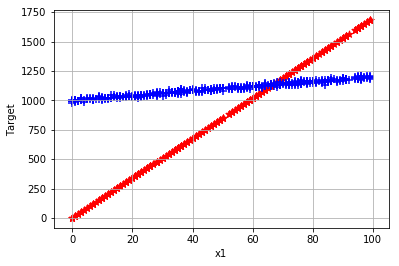

In [73]:
#バイアス無し　予測結果
result = regr_wo_bias.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b')

#### バイアス有り・無し検証結果 (バイアス有りデータを使った場合)

1. 学習の様子  
Lossから、バイアス有りの場合は徐々にloss が収束して行くが、バイアス無しの場合はすぐに収束する。   
Theatのプロットから、極値を見つけた後さらに実際の値へ近づいている。（ように見える。）
2. 学習の結果
データに意図的にバイアスを入れているため、  
バイアス有りの場合は、良いモデル（係数、バイアスが実際のデータに近い ）ができた。  
バイアス無しの場合は、係数だけの調整なので実際のデータとかけ離れた係数に収束してしまった。  
3. 予測結果
バイアス有りの場合は、特徴量X1からターゲットY1を良く予測できている。  
バイアス無しの場合は、特徴量X1からターゲットY1を予測できていない。

#### バイアス無しデータで検証

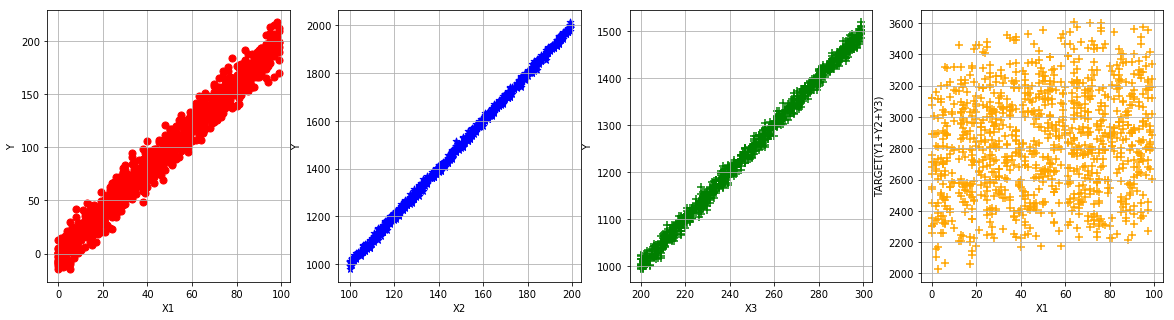

In [180]:
#バイアス無しデータを作る
#適当な分散を持つ、線形な(Y1,X1),(Y2,X2),(Y3,X3)を生成
A = 2
B = 0
X1 = np.array(np.random.randint(0, 100, 1000))
Y1 = np.array((X1 * A + B) + 10*np.random.randn(X1.shape[0]))

A = 10
B = 0
X2 = np.array(np.random.randint(100, 200, 1000))
Y2 = np.array((X2 * A + B) + 10*np.random.randn(X2.shape[0]))

A = 5
B = 0
X3 = np.array(np.random.randint(200, 300, 1000))
Y3 = np.array((X3 * A + B) + 10*np.random.randn(X3.shape[0]))
#print(Y1)

data = pd.DataFrame()
data["TARGET"] = Y1 + Y2 + Y3
data["Y1"] = Y1
data["Y2"] = Y2
data["Y3"] = Y3
data["X1"] = X1
data["X2"] = X2
data["X3"] = X3

fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 4), (0, 0))
ax1.grid(True)
ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
ax1.scatter(data["X1"], data["Y1"], s=50, marker='o', color='r') 
ax2 = plt.subplot2grid((1, 4), (0, 1))
ax2.grid(True)
ax2.set_xlabel('X2')
ax2.set_ylabel('Y')
ax2.scatter(data["X2"], data["Y2"], s=50, marker='*', color='b')             
ax3 = plt.subplot2grid((1, 4), (0, 2))
ax3.grid(True)
ax3.set_xlabel('X3')
ax3.set_ylabel('Y')
ax3.scatter(data["X3"], data["Y3"], s=50, marker='+', color='green')
ax3 = plt.subplot2grid((1, 4), (0, 3))
ax3.grid(True)
ax3.set_xlabel('X1')
ax3.set_ylabel('TARGET(Y1+Y2+Y3)')
ax3.scatter(data["X1"], data["TARGET"], s=50, marker='+', color='orange')

In [181]:
#とりあえず特徴量X1、ターゲットY1のみで学習を行う。
train_feature, test_feature, train_target, test_target = train_test_split(data[["X1"]].values, data["Y1"].values, test_size=0.4, random_state=None)

In [182]:
#bias有り
regr_w_bias = cLinearRegression.ScratchLinearRegression(num_iter=45000, lr=0.00058, bias=True, verbose=True)

In [183]:
#bias無し
regr_wo_bias = cLinearRegression.ScratchLinearRegression(num_iter=45000, lr=0.00058, bias=False, verbose=True)

In [184]:
regr_w_bias.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[4]
 [7]]
Theta:
[[-1.02061889]
 [ 2.01447876]]
Feature:
[[ 1  1  1 ...  1  1  1]
 [78 71 95 ...  0 69 64]]
Target:
[150.26867574 155.22745061 207.97475812 186.77243161 119.44282698
  23.31782892 137.82067898 174.04817748  66.33845124 189.45885243
 128.02008186  75.36760432  57.05395073   2.45303847 140.77084056
  66.52447697  50.33851163 188.29426076  33.66606217 105.68260086
 179.1696526   94.33614414 144.95823939  19.27633109  -3.8852914
  68.88831284  91.42735104  37.13260408  63.3567645   65.58043344
 128.027308    85.54154936 103.28545122  62.31748478 155.58977891
 184.59197642 169.69997679  76.66530443  68.92973936 182.86502222
 183.51152641  70.97987563 159.38122723  67.16063284  89.43692392
 129.14850715 129.89322058 165.94639516  50.60631716  89.59202831
  69.4272177   60.96596479  27.5494106  123.687043   166.22483135
 189.97237341  60.68442947 153.56787309 139.33631896 114.60044533
 185.24636978  65.14046947 140.87406707  77.86395477   1.20121891
 162.370173

In [192]:
regr_wo_bias.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[8]]
Theta:
[[1.99897825]]
Feature:
[[78 71 95 92 61 13 73 85 37 91 55 44 39  2 72 31 25 89 17 40 88 46 76  9
   7 36 50 14 24 38 68 46 50 40 75 78 86 42 30 99 90 32 85 32 46 66 65 77
  22 44 41 29 18 66 88 91 28 85 67 65 95 39 69 39  5 80 55 18 97 14 58 63
  61 20  6 89 84 26 79 49 27 43 50 19 47 70 12 53 73 73  0 75 51  9 28  5
  49  7 16 85 26 96 99 68 79 43 78 42 88 84 48 16 27 23 57 67 58 74 30 30
  46 14 23 91 13 48 94 89 63 32 34 69 95  5 69 42 98  7  6  4 80 82 42 74
  25 39 62 76  5 88 26 55 64 54  0  2 85 18 54 57 91 66 53 83 77 70 18 19
  73  2 55 29 34 48 87 18 19 90  3 86 95 40 72 77 95  4 56  7 47 54 53 88
  47  7 27 71 86 75  5 17 18 98 25 38 91 72 47 19  4 97 95 54  5 10 34 29
  25  2 71 34 36 26 42 52 70 31 98 42  4 86 64 13 65 61 13 60 35 29  0 59
  59 90 87 64 68  3 85 85 72 50 83 75 70 45 61 66  2 24 82  6 29 30 44 82
  12 26 74 48 24 95 78  6 18 89 79  8  5 15 38 56 43 84 19 69 26 50 26 37
  64 68 64 35 12 27 53 83 75 20  0 74 64 71 73 65 26 23 73 8

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


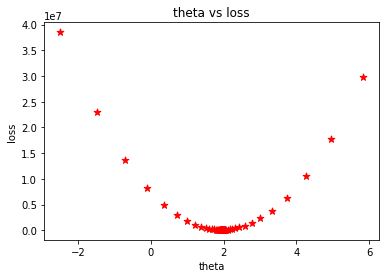

In [186]:
#バイアス有り loss-theta
regr_w_bias.plot_theta_loss()

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


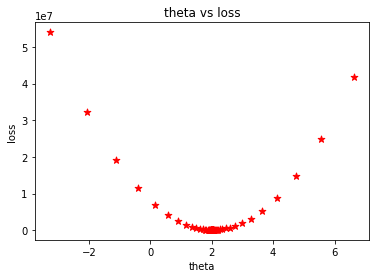

In [193]:
#バイアス無し loss-theta
regr_wo_bias.plot_theta_loss()

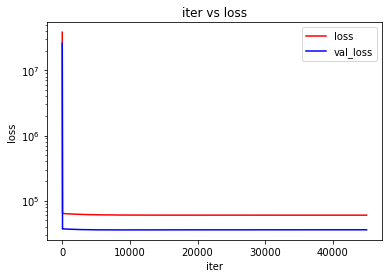

In [188]:
#バイアス有り loss
regr_w_bias.plot_loss()

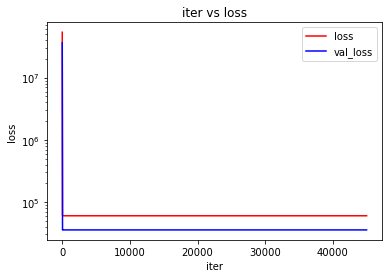

In [194]:
#バイアス無し loss
regr_wo_bias.plot_loss()

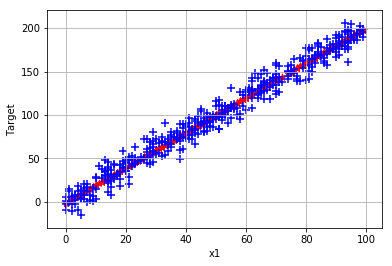

In [190]:
#バイアス有り 予測結果
result = regr_w_bias.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b') 

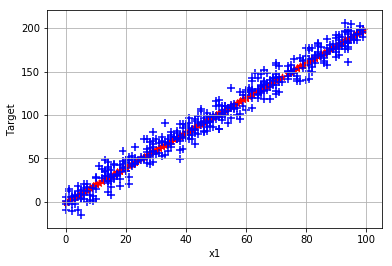

In [195]:
#バイアス無し　予測結果
result = regr_wo_bias.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b')

#### バイアス有り・無し検証結果（バイアス無しデータで検証を行なった場合）
1. バイアス有り無しで大きな差はなかった。

#### 【問題4】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

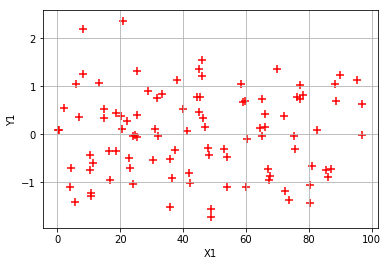

In [148]:
#テストデータを作る
X1 = np.array(0.1*np.random.randint(0, 1000, 100))
Y1 = np.array(((np.sin(X1)) + 0.5*np.random.randn(X1.shape[0])))

data_sin = pd.DataFrame()
data_sin["TARGET"] = Y1
data_sin["Y1"] = Y1
data_sin["X1"] = X1

plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y1')
plt.scatter(data_sin["X1"], data_sin["Y1"], s=50, marker='+', color='r') 

In [162]:
#多項式データを作る
data_sin["X1_2"] = (data_sin["X1"].values)**2
data_sin["X1_3"] = (data_sin["X1"].values)**3
data_sin["X1_4"] = (data_sin["X1"].values)**4
data_sin["X1_5"] = (data_sin["X1"].values)**5

train_feature, test_feature, train_target, test_target = train_test_split(data_sin[["X1", "X1_2","X1_3"]].values, data_sin["TARGET"].values, test_size=0.4, random_state=None)

In [173]:
regr = cLinearRegression.ScratchLinearRegression(num_iter=450000, lr=1e-15, bias=False, verbose=True)

In [174]:
regr.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[4]
 [2]
 [1]]
Theta:
[[ 3.9998232 ]
 [ 1.98683751]
 [-0.0253043 ]]
Feature:
[[1.49000000e+01 1.69000000e+01 1.13000000e+01 7.20000000e+01
  2.54000000e+01 5.96000000e+01 2.55000000e+01 5.80000000e+00
  6.46000000e+01 3.75000000e+01 4.62000000e+01 3.90000000e+00
  2.30000000e+01 2.04000000e+01 4.64000000e+01 3.59000000e+01
  4.14000000e+01 4.50000000e+01 6.00000000e+00 4.46000000e+01
  8.72000000e+01 1.07000000e+01 7.73000000e+01 5.40000000e+01
  6.50000000e+01 6.05000000e+01 4.61000000e+01 2.48000000e+01
  8.05000000e+01 2.09000000e+01 3.06000000e+01 4.81000000e+01
  8.82000000e+01 6.00000000e+01 6.78000000e+01 3.12000000e+01
  4.19000000e+01 7.56000000e+01 7.73000000e+01 8.27000000e+01
  3.60000000e+01 8.09000000e+01 8.54000000e+01 7.00000000e+01
  9.71000000e+01 3.34000000e+01 8.05000000e+01 8.86000000e+01
  4.90000000e+01 2.28000000e+01 3.82000000e+01 5.40000000e+01
  4.55000000e+01 3.00000000e-01 2.42000000e+01 8.60000000e+01
  6.70000000e+01 7.52000000e+01 8.10000

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


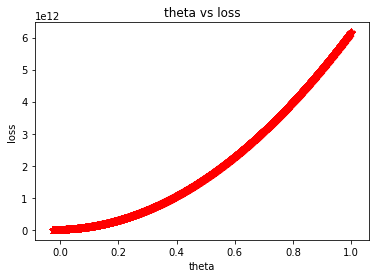

In [175]:
regr.plot_theta_loss()

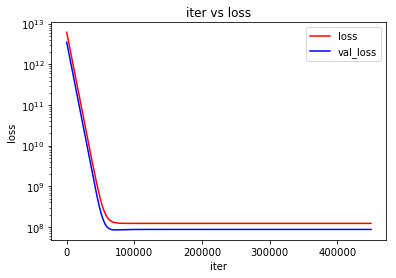

In [176]:
regr.plot_loss()

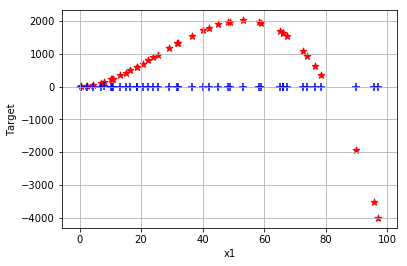

In [177]:
result = regr.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b')

#### 【問題5】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

線形回帰モデルでは、学習データから目的変数と（特徴量ベクトル * 係数ベクトルθ）のMSEが最小になるθを求めモデルを構築する。MSE最小になるθを求めるため最急降下法を用いる。  
最急降下法の勾配はMSEのθに対する微分で求められる。最急降下法の式は以下のように定義される。  
　　$ \theta_j = \theta_j - \frac{\partial}{\partial \theta_j} J(\theta) $   
$J(\theta)$はMSEなので、MSEを代入すると  
　　$ \theta_j = \theta_j - \alpha \times \frac{\partial}{\partial \theta_j} (\frac{1}{m}) \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $  
となる。  
$(h_\theta(x^{(i)}) - y^{(i)})$を$T_i$と置いて式の微分部分を計算すると  
  
　　$ \frac{\partial h(\theta)}{\partial \theta_j} = \frac{\partial h(\theta)}{\partial T} \frac{\partial T(\theta)}{\partial \theta_j} $  
　　$ \frac{\partial h(\theta)}{\partial \theta_j}= 2(\frac{1}{m}) \sum_{i=1}^m T_i \frac{\partial h(\theta)}{\partial \theta}$  
ここで、$ \frac{\partial h(\theta)}{\partial \theta} $　は、$ \frac{\partial}{\partial \theta_j}(\theta_0*x_0 + \theta_1*x_1...\theta_j*x_j) = x_j$  
なので、最急降下法の式は、  
　　$ \theta_j = \theta_j - (\frac{\alpha}{m}) \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j $  
となる。

#### 【問題6】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

線形回帰では、予測結果（モデル）と目的変数（入力データ）の差が最小になるθを各説明変数ベクトル毎に求めている。モデルとデータの差はMSE（モデルとデータの差の２乗）によって評価されるが、線形回帰モデルでは予測結果は説明変数の１次式で表されるため、θに対してMSEをプロットすると必ず下に凸の２乗曲線になる。これは谷が１つのデータであるため局所解は存在せず最急降下法を用いると必ず最適解が求まる。

#### 【問題7】スクラッチで学べることは何か
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。
ライブラリを使うのではなくスクラッチでアルゴリズムを実装したことで学べたことは何か